<i class="fa fa-arrow-circle-down" aria-hidden="true"> 请在下方代码块中开始编写代码！</i>

In [1]:
import warnings
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')

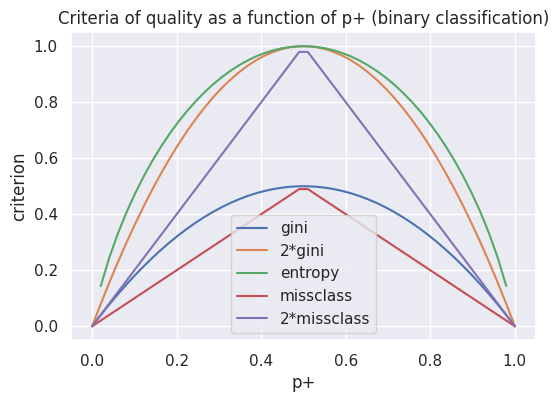

In [2]:
plt.figure(figsize=(6, 4))
xx = np.linspace(0, 1, 50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)
              for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Criteria of quality as a function of p+ (binary classification)')
plt.legend()

In [11]:
# 第一类
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)
print(train_data.shape)
# 第二类
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

print(train_data.shape)
# print(train_labels)

# np.r_ 是以行为优先

(100, 2)
(200, 2)


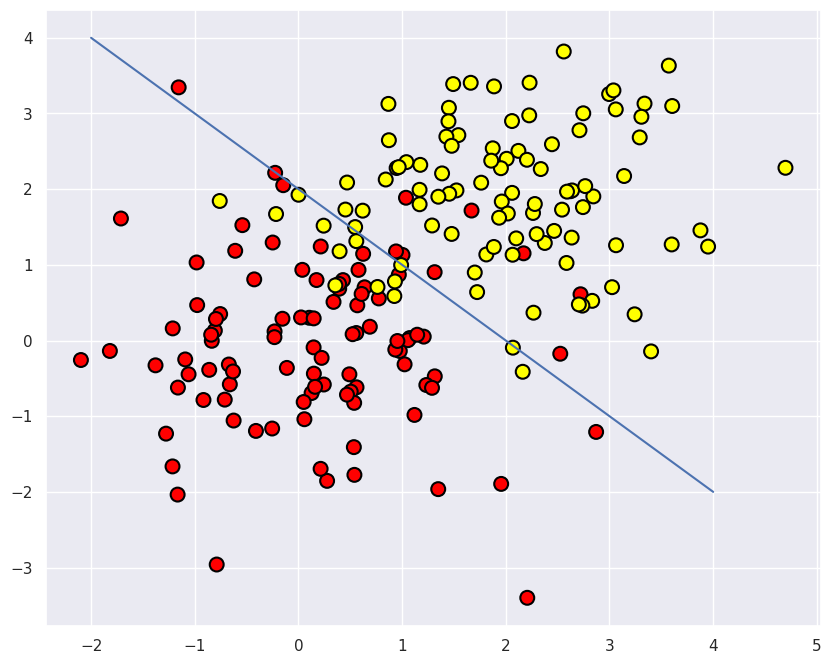

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.plot(range(-2, 5), range(4, -3, -1))

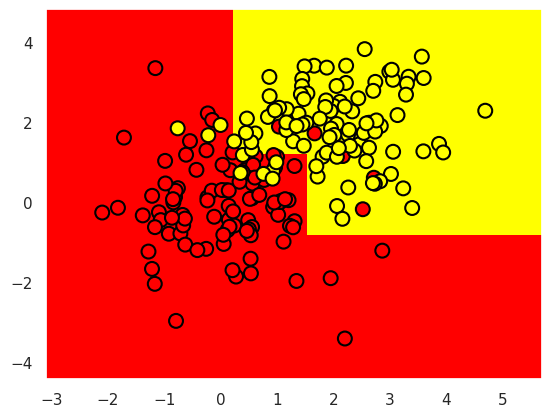

In [12]:
from sklearn.tree import DecisionTreeClassifier
# 编写一个辅助函数，返回之后的可视化网格


def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


#  max_depth 参数限制决策树的深度
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                  random_state=17)
# 训练决策树
clf_tree.fit(train_data, train_labels)
# 可视化
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(),
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
            cmap='autumn', edgecolors='black', linewidth=1.5)

sklearn.tree.DecisionTreeClassifier 类的主要参数为：

max_depth 树的最大深度；
max_features 搜索最佳分区时的最大特征数（特征很多时，设置这个参数很有必要，因为基于所有特征搜索分区会很「昂贵」）；
min_samples_leaf 叶节点的最少样本数。
树的参数需要根据输入数据设定，通常通过交叉验证可以确定参数范围，下文会具体讨论交叉验证。

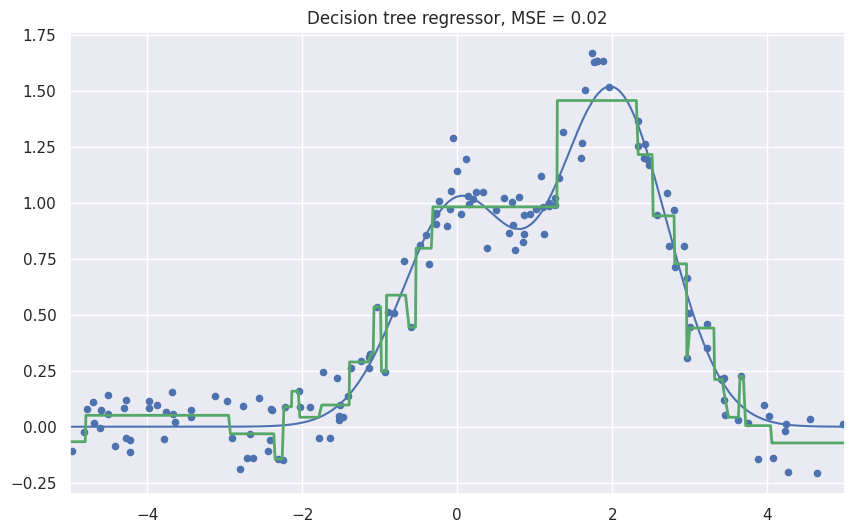

In [13]:
from sklearn.tree import DecisionTreeRegressor
n_train = 150
n_test = 1000
noise = 0.1


def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)


def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
        np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y


X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)


reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" %
          (np.sum((y_test - reg_tree_pred) ** 2) / n_test))
plt.show()

In [17]:
X=np.random.rand(6) * 10 - 5
np.sort(X)

array([-2.168266  ,  0.24948295,  2.5464518 ,  3.25906222,  3.40030677,
        4.38325344])

优势：

生成容易理解的分类规则，这一属性称为模型的可解释性。例如它生成的规则可能是「如果年龄不满 25 岁，并对摩托车感兴趣，那么就拒绝发放贷款」。
很容易可视化，即模型本身（树）和特定测试对象的预测（穿过树的路径）可以「被解释」。
训练和预测的速度快。
较少的参数数目。
支持数值和类别特征。
劣势：

决策树对输入数据中的噪声非常敏感，这削弱了模型的可解释性。
决策树构建的边界有其局限性：它由垂直于其中一个坐标轴的超平面组成，在实践中比其他方法的效果要差。
我们需要通过剪枝、设定叶节点的最小样本数、设定树的最大深度等方法避免过拟合。
不稳定性，数据的细微变动都会显著改变决策树。这一问题可通过决策树集成方法来处理（以后的实验会介绍）。
搜索最佳决策树是一个「NP 完全」（NP-Complete）问题。了解什么是 NP-Complete 请点击  这里。实践中使用的一些推断方法，比如基于最大信息增益进行贪婪搜索，并不能保证找到全局最优决策树。
倘若数据中出现缺失值，将难以创建决策树模型。Friedman 的 CART 算法中大约 50% 的代码是为了处理数据中的缺失值（现在 sklearn 实现了这一算法的改进版本）。
这一模型只能内插，不能外推。也就是说，倘若你预测的对象在训练集所设置的特征空间之外，那么决策树就只能做出常数预测。比如，在我们的黄球和蓝球的例子中，这意味着模型将对所有位于 >19 或 <0 的球做出同样的预测。